# Upper Confidence Bound (UCB)

The UCB algorithm is a part of one of the most exciting branches of Machine Learning, the Reinforcement Learning -- a step toward artificial intelligence (AI).

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

The dataset is ads CTR optimization. CTR means click through rate. We will sove here the next part of the story of the car dealership trying to sell new SUV, we have alreadly optimized the target customers using various classification algorithms and we will optimize the CTR of some ads of this new SUV. The advertising team prepared 10 different ads or 10 different designs. **Question: which ad will attract the most people to click the ad and then buy the new SUV?**

We are going to show 10 different ads online once an user connect to a website or search engine. We will show each of these ads each time the user connects to the webpage and we are going to keep record whether the user clicked on the ad (yes/1) or not (no/0). When an user connect to the webpage, the UCB algorithm shows an ad, if the user click on the ad it records 1 and if does not select it records 0. This is then done for a lots of users. In reality, everything happens in real time and hence it is a dynamic process -- it is not a static dataset which was recorded over a certime time period.

In this dataset each row corresponds to different users connecting to the webpage, each column corresponds to the different ads. e.g., user-1 clicked only on ad-1, 5 and 9, user-2 clicked only on ad-9 and so on. We have total 10000 users data, first we will implement UCB algorithm and then Thompson sampling algorithm to figure out the ad that has the highest conversion rate or the ad on which users click the most. We could do this by using some simple statistics of couting which ad is most clicked on, but remember that each time we show an ad in search engine like Google or webpage like Amazon, it incurs a huge cost. Therefore we **need to figure out as fast as possible i.e., in minimum number of rounds which ad has highest conversion rate**. Each user or each row is a **round** here. And that is why we need a stronger algorithm than a simple statistic.

One thing is very important to note that each ad in the dataset has certain fixed conversion rate -- assumption of UCB and Thompson algorithm (**important assumption of RL**). This is similar to the slot machines in casino, each machine has a fixed distribution.

The UCB algorithm is a very exciting and widely used algorithm in online advertising or digital marketing.

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## Implementing UCB

**UCB algorithm:**

1. At each round $n$ we consider two numbers for each ad $i$. \\
$N_i(n) = $ the number of times the ad $i$ was selected up to round $n$, \\
$R_i(n) = $ the sum of rewards of the ad $i$ up to round $n$.

2. From these two numbers we compute: \\
* the average reward of the ad $i$ up to round $n$, \\
$\bar{r}_i(n) = \frac{R_i(n)}{N_i(n)}$

* the confidence interval $[\bar{r}_i(n) - \Delta_i(n), \bar{r}_i(n) + \Delta_i(n)]$ at round $n$ with \\
$\Delta_i(n) = \sqrt{\frac{3}{2} \frac{log(n)}{N_i(n)}}$.

3. Select the ad $i$ that has the maximum UCB: $\bar{r}_i(n) + \Delta_i(n)$.

Remember that each round menas each user or each row in the dataset. So, ad index $i$ takes values from 1 to $d$ (in python 0 to $d-1$) where d = no. of ads.

In [ ]:
import math

N = 10000   # total number of users or rounds or rows in the dataset.
d = 10   # total number of ads.

ads_selected = []   # list of all the ads selected. This will get bigger and bigger over the round and contain total N elements at the end.
numbers_of_selections = [0] * d   # This is N_i(n) as explained above for each ad i (i takes value from 0 to d-1). This is a list of d elements, will contain number of times each ad is selected over the round. Initilize d elements for d ads as 0 since there is no selection at the beginning. So it is initilized as list of 10 zeros. Each time we select an ad, say i, will be incremented by 1. In the end we want to see which ad is selected most.
sums_of_rewards = [0] * d   # This is R_i(n). This is same as number_of_selections list except here we add up the rewards (0 or 1) of corresponding ad, insted of just counting.
total_reward = 0   # This variable sums all the rewards received at each round. The 0's and 1's in the dataset are rewards here. If the user click an ad, reward = 1 otherwise reward = 0.

for n in range(0, N):   # iterate over rounds or rows.
  ad = 0   # For each round/row we initilize the ad index = 0. Then in the for loop of i we go through each ad and compare their UCB to find the ad having maximum UCB. Ultimate goal is to find the ad having highest UCB in each round.
  max_upper_bound = 0   # For each round/row we initilize this also as 0. This variable stores the value of maximum UCB to compare with.
  for i in range(0, d):   # iterate over ads (columns) in a specific row.
    if (numbers_of_selections[i] > 0):   # we use this if condition as in the beginning numbers_of_selections is 0 for all the ads and hence computing average_reward become meaningless (denominator being zero). So, number of selections has to be non-zero (or > 0) for each ad to compute average_reward and then upper_bound. So, in the normal state when number of selections > 0, we do the computations.
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]   # Compute average reward for each ad, in a specific round.
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])   # use math.sqrt() and math.log() functions from math library. If the argument of log() function would be n (instead of n+1), it would not be -infinity for n = 0 (the other way is to use range(1, N+1) as iterable in the for loop of n).
      upper_bound = average_reward + delta_i   # Compute UCB of each ad, in a specific round.
    else:
      upper_bound = 1e400   # To select the ads that has not been selected yet. This is because we first want to select all the ads at least once to make N_i(n) > 0 such that we can compute average_reward. That is in the UCB algorithm it is compulsory to make sure that during first d rounds all ads are selected. We chose this as a super high value (~inifinity) so that it becomes maximum UCB and hence the corresponding ad is selected. Once all the ads are selected at least once (i.e., after first d rounds), this block stops working.
    if (upper_bound > max_upper_bound):   # In the normal state when all the ads are selected at least once, in each round we compute UCB of all the ads and select maximum UCB and the corresponding ad index.
      max_upper_bound = upper_bound   # In each round, we compute upper_bound for all the ads one by one. When upper_bound > max_upper_bound (collected so far for the pervious ads), update max_upper_bound with the new upper_bound.
      ad = i   # In each round, select the ad (or ad index) that has the maximum UCB.

  ads_selected.append(ad)   # Update full list of all the ads selected. This contains sequence of ads that were selected over the rounds. Each element of this list is the ad index that is selected in each round via maximum UCB. This list will have total N elements at the end.
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1   # Once an ad is selected in a round via maximum UCB, we increment the count of number of selections of that ad.
  reward = dataset.values[n, ad]   # Get the value of reward (1 if selected, 0 if not selected) from the dataset, for the specific round (row) and selected ad (column). This is the reward of each round in Reinforcement Learning.
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward   # Update reward list for each ad in each round. When an ad is selected via maximum UCB, we add the reward to that ad. And the reward is just the value present in the dataset for the corresponding round (row) and the ad (column).
  total_reward = total_reward + reward   # Here we just all the rewards independent of ad index.

# Note that when an ad (or ad index) is selected via maximum UCB in each round, we always increment the count of that ad in the numbers_of_selections
# list. But the reward is not always 1 for that selected ad (in each round) -- reward can be 0 or 1. So, numbers_of_selections and sums_of_rewards
# lists have different values for each ad. In fact for each ad, value of sums_of_rewards <= numbers_of_selections which you can see in the next print
# code cell.


In [ ]:
# Outputs

print(ads_selected)
print(numbers_of_selections)
print(sums_of_rewards)
print(total_reward)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 0, 1, 6, 4, 7, 2, 8, 3, 5, 9, 9, 9, 9, 4, 0, 1, 

## Visualising the results

We will plot a bar chart for all the ads. The bar chart will show **number of times each ad has been selected**.

$x$-axis: ad indices and $y$-axis: frequency of selection of each ad.

The **expectation** from the visualization is that one of the ads will be selected much more times than the other ads because the goal of the UCB algorithm is, as fast as possible, to identify the ad that has the highest CTR.

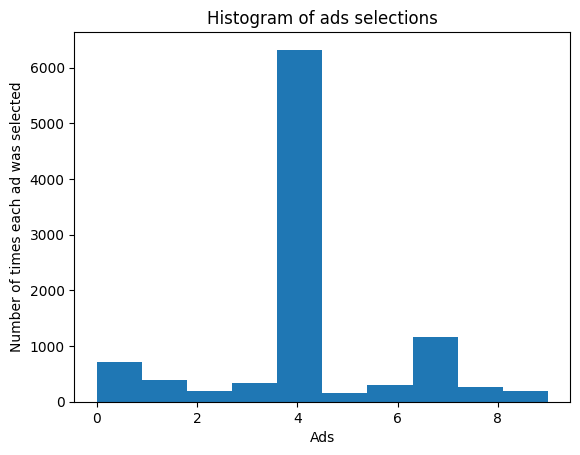

In [ ]:
# Plot
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()


We clearly see that the **ad index 4 (or ad number 5)** has been selected most and that is way higher than the other ads. This ad has the highest CTR. So this ad will be used in future to attract people.

However the goal is to identify this highest CTR ad as fast as possible or in minimum number of rounds. Therefore we should experiment in how many minimum rounds the UCB algorithm was able to identify ad-5 with highest CTR. For this we keep decreasing the value of $N$, total number of rounds in the above implementation code

## Vary the number of rounds $N$

### $N = 1000$

In [ ]:
# N = 1000.

import math

N = 1000   # total number of users or rounds or rows in the dataset.
d = 10   # total number of ads.

ads_selected = []   # list of all the ads selected. This will get bigger and bigger over the round and contain total N elements at the end.
numbers_of_selections = [0] * d   # This is N_i(n) as explained above for each ad i (i takes value from 0 to d-1). This is a list of d elements, will contain number of times each ad is selected over the round. Initilize d elements for d ads as 0 since there is no selection at the beginning. So it is initilized as list of 10 zeros. Each time we select an ad, say i, will be incremented by 1. In the end we want to see which ad is selected most.
sums_of_rewards = [0] * d   # This is R_i(n). This is same as number_of_selections list except here we add up the rewards (0 or 1) of corresponding ad, insted of just counting.
total_reward = 0   # This variable sums all the rewards received at each round. The 0's and 1's in the dataset are rewards here. If the user click an ad, reward = 1 otherwise reward = 0.

for n in range(0, N):   # iterate over rounds or rows.
  ad = 0   # For each round/row we initilize the ad index = 0. Then in the for loop of i we go through each ad and compare their UCB to find the ad having maximum UCB. Ultimate goal is to find the ad having highest UCB in each round.
  max_upper_bound = 0   # For each round/row we initilize this also as 0. This variable stores the value of maximum UCB to compare with.
  for i in range(0, d):   # iterate over ads (columns) in a specific row.
    if (numbers_of_selections[i] > 0):   # we use this if condition as in the beginning numbers_of_selections is 0 for all the ads and hence computing average_reward become meaningless (denominator being zero). So, number of selections has to be non-zero (or > 0) for each ad to compute average_reward and then upper_bound. So, in the normal state when number of selections > 0, we do the computations.
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]   # Compute average reward for each ad, in a specific round.
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])   # use math.sqrt() and math.log() functions from math library. If the argument of log() function would be n (instead of n+1), it would not be -infinity for n = 0 (the other way is to use range(1, N+1) as iterable in the for loop of n).
      upper_bound = average_reward + delta_i   # Compute UCB of each ad, in a specific round.
    else:
      upper_bound = 1e400   # To select the ads that has not been selected yet. This is because we first want to select all the ads at least once to make N_i(n) > 0 such that we can compute average_reward. That is in the UCB algorithm it is compulsory to make sure that during first d rounds all ads are selected. We chose this as a super high value (~inifinity) so that it becomes maximum UCB and hence the corresponding ad is selected. Once all the ads are selected at least once (i.e., after first d rounds), this block stops working.
    if (upper_bound > max_upper_bound):   # In the normal state when all the ads are selected at least once, in each round we compute UCB of all the ads and select maximum UCB and the corresponding ad index.
      max_upper_bound = upper_bound   # In each round, we compute upper_bound for all the ads one by one. When upper_bound > max_upper_bound (collected so far for the pervious ads), update max_upper_bound with the new upper_bound.
      ad = i   # In each round, select the ad (or ad index) that has the maximum UCB.

  ads_selected.append(ad)   # Update full list of all the ads selected. This contains sequence of ads that were selected over the rounds. Each element of this list is the ad index that is selected in each round via maximum UCB. This list will have total N elements at the end.
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1   # Once an ad is selected in a round via maximum UCB, we increment the count of number of selections of that ad.
  reward = dataset.values[n, ad]   # Get the value of reward (1 if selected, 0 if not selected) from the dataset, for the specific round (row) and selected ad (column). This is the reward of each round in Reinforcement Learning.
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward   # Update reward list for each ad in each round. When an ad is selected via maximum UCB, we add the reward to that ad. And the reward is just the value present in the dataset for the corresponding round (row) and the ad (column).
  total_reward = total_reward + reward   # Here we just all the rewards independent of ad index.

# Note that when an ad (or ad index) is selected via maximum UCB in each round, we always increment the count of that ad in the numbers_of_selections
# list. But the reward is not always 1 for that selected ad (in each round) -- reward can be 0 or 1. So, numbers_of_selections and sums_of_rewards
# lists have different values for each ad. In fact for each ad, value of sums_of_rewards <= numbers_of_selections which you can see in the next print
# code cell.


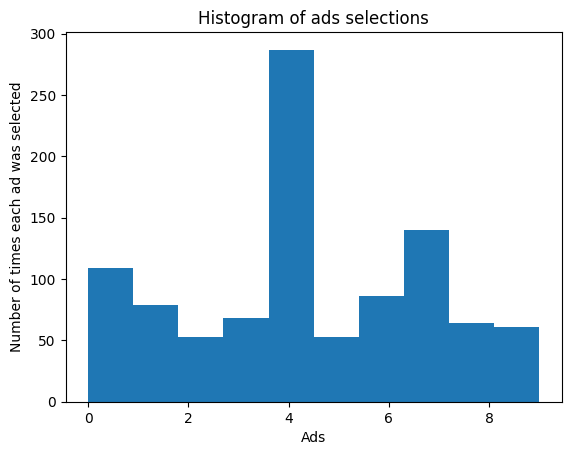

In [ ]:
# Plot
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()


**Even with 1000 rounds UCB algorithm is able to identify the best CTR ad.**

### $N = 500$

In [ ]:
# N = 500.

import math

N = 500   # total number of users or rounds or rows in the dataset.
d = 10   # total number of ads.

ads_selected = []   # list of all the ads selected. This will get bigger and bigger over the round and contain total N elements at the end.
numbers_of_selections = [0] * d   # This is N_i(n) as explained above for each ad i (i takes value from 0 to d-1). This is a list of d elements, will contain number of times each ad is selected over the round. Initilize d elements for d ads as 0 since there is no selection at the beginning. So it is initilized as list of 10 zeros. Each time we select an ad, say i, will be incremented by 1. In the end we want to see which ad is selected most.
sums_of_rewards = [0] * d   # This is R_i(n). This is same as number_of_selections list except here we add up the rewards (0 or 1) of corresponding ad, insted of just counting.
total_reward = 0   # This variable sums all the rewards received at each round. The 0's and 1's in the dataset are rewards here. If the user click an ad, reward = 1 otherwise reward = 0.

for n in range(0, N):   # iterate over rounds or rows.
  ad = 0   # For each round/row we initilize the ad index = 0. Then in the for loop of i we go through each ad and compare their UCB to find the ad having maximum UCB. Ultimate goal is to find the ad having highest UCB in each round.
  max_upper_bound = 0   # For each round/row we initilize this also as 0. This variable stores the value of maximum UCB to compare with.
  for i in range(0, d):   # iterate over ads (columns) in a specific row.
    if (numbers_of_selections[i] > 0):   # we use this if condition as in the beginning numbers_of_selections is 0 for all the ads and hence computing average_reward become meaningless (denominator being zero). So, number of selections has to be non-zero (or > 0) for each ad to compute average_reward and then upper_bound. So, in the normal state when number of selections > 0, we do the computations.
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]   # Compute average reward for each ad, in a specific round.
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])   # use math.sqrt() and math.log() functions from math library. If the argument of log() function would be n (instead of n+1), it would not be -infinity for n = 0 (the other way is to use range(1, N+1) as iterable in the for loop of n).
      upper_bound = average_reward + delta_i   # Compute UCB of each ad, in a specific round.
    else:
      upper_bound = 1e400   # To select the ads that has not been selected yet. This is because we first want to select all the ads at least once to make N_i(n) > 0 such that we can compute average_reward. That is in the UCB algorithm it is compulsory to make sure that during first d rounds all ads are selected. We chose this as a super high value (~inifinity) so that it becomes maximum UCB and hence the corresponding ad is selected. Once all the ads are selected at least once (i.e., after first d rounds), this block stops working.
    if (upper_bound > max_upper_bound):   # In the normal state when all the ads are selected at least once, in each round we compute UCB of all the ads and select maximum UCB and the corresponding ad index.
      max_upper_bound = upper_bound   # In each round, we compute upper_bound for all the ads one by one. When upper_bound > max_upper_bound (collected so far for the pervious ads), update max_upper_bound with the new upper_bound.
      ad = i   # In each round, select the ad (or ad index) that has the maximum UCB.

  ads_selected.append(ad)   # Update full list of all the ads selected. This contains sequence of ads that were selected over the rounds. Each element of this list is the ad index that is selected in each round via maximum UCB. This list will have total N elements at the end.
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1   # Once an ad is selected in a round via maximum UCB, we increment the count of number of selections of that ad.
  reward = dataset.values[n, ad]   # Get the value of reward (1 if selected, 0 if not selected) from the dataset, for the specific round (row) and selected ad (column). This is the reward of each round in Reinforcement Learning.
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward   # Update reward list for each ad in each round. When an ad is selected via maximum UCB, we add the reward to that ad. And the reward is just the value present in the dataset for the corresponding round (row) and the ad (column).
  total_reward = total_reward + reward   # Here we just all the rewards independent of ad index.

# Note that when an ad (or ad index) is selected via maximum UCB in each round, we always increment the count of that ad in the numbers_of_selections
# list. But the reward is not always 1 for that selected ad (in each round) -- reward can be 0 or 1. So, numbers_of_selections and sums_of_rewards
# lists have different values for each ad. In fact for each ad, value of sums_of_rewards <= numbers_of_selections which you can see in the next print
# code cell.

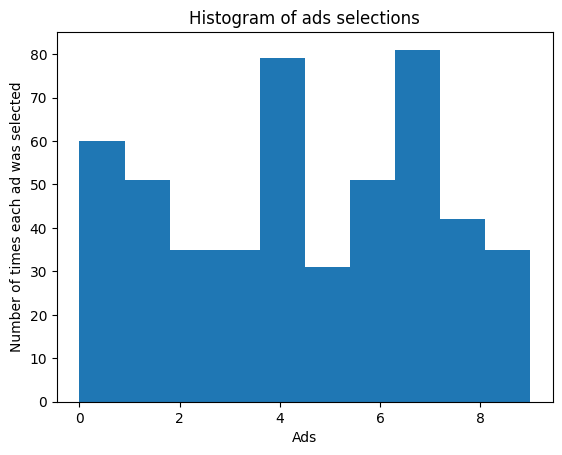

In [ ]:
# Plot
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()


**But 500 rounds is not enough to identify the best CTR ad using UCB algorithm.**

In fact UCB algorithm identify ad index 7 as the highest CTR ad.  

So, with UCB algorithm, we can say **1000 rounds** are needed to correctly identify the highest CTR ad.

Next we will use Thompson sampling algorithm and see if it can beat (means in lower number of rounds) the UCB!!